In [235]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from astropy.io import fits

from Py3D.core import image
from Py3D.functions import imageMethod

In [92]:
# define lab data path following SDSS nomenclature
# examples of dark frames (zero length exposure, closed shutter)
# examples of bias frames (non-zero length exposure, closed shutter)
# identify regions: pre-scan, over-scan, science
# remove non-science regions: pre-scan, overscan
# compute dark statistics:
#  - mean, median, standard deviation
#  - if there are several exposures, look for statistical variations between exposures
# compute bias statistics:
#  - mean, median, standard deviation
#  - if there are several exposures, look for statistical variations between exposures
#  - compare over-scan bias and science bias
# hints of CCDflat: look for common patterns in both set of images

In [108]:
# data root path
LVM_DEV = os.path.expandvars("$LVMHUB")
LVM_ROOT = os.path.join(LVM_DEV, "data.sdss5.org/sas/sdsswork/data/lvm")
LVM_DATA_LAB = os.path.join(LVM_ROOT, "lab")

In [168]:

frames_meta = pd.read_csv(os.path.join(LVM_DATA_LAB, "LVMI Exposure List - Sheet1.csv"))
frames_meta.filename = frames_meta.filename.str.strip()
frames_meta.set_index(["mjd","filename"], inplace=True)
frames_meta = frames_meta.drop_duplicates()

print(f"No. lab frames: {len(frames_meta)}")

No. lab frames: 1048


In [193]:
frame_paths = sorted([os.path.join(root,file) for root, _, files in os.walk(LVM_DATA_LAB) for file in files if (pd.to_numeric(os.path.basename(root),errors="ignore"),file) in frames_meta.index])
print(f"frames matched in lab data path: {len(frame_paths)}")

frames matched in lab data path: 86


In [205]:
new_index = list(map(lambda filepath: (int(os.path.basename(os.path.dirname(filepath))), os.path.basename(filepath)), frame_paths))

frames_meta_match = frames_meta.loc[new_index]
frames_meta_match["filepath"] = frame_paths
frames_meta_match

exp_no        date location test_no  \
mjd   filename                                                         
59364 sdR-s-r1-00000318.fits.gz     318  30/05/2021      SBS     NaN   
59365 sdR-s-r1-00000325.fits.gz     325  31/05/2021      SBS     NaN   
      sdR-s-r1-00000326.fits.gz     326  31/05/2021      SBS     NaN   
      sdR-s-r1-00000327.fits.gz     327  31/05/2021      SBS     NaN   
      sdR-s-r1-00000328.fits.gz     328  31/05/2021      SBS     NaN   
...                                 ...         ...      ...     ...   
59436 sdR-s-z1-00000412.fits.gz     412  10/08/2021      SBS     NaN   
      sdR-s-z1-00000413.fits.gz     413  10/08/2021      SBS     NaN   
      sdR-s-z1-00000414.fits.gz     414  10/08/2021      SBS     NaN   
      sdR-s-z1-00000415.fits.gz     415  10/08/2021      SBS     NaN   
59437 sdR-s-b1-00000437.fits.gz     437  11/08/2021      SBS     NaN   

                                test_iteration spec channel sources  \
mjd   filename                                                        
59364 sdR-s-r1-00000318.fits.gz            NaN  sp1      r1     NaN   
59365 sdR-s-r1-00000325.fits.gz            NaN  sp1      r1     NaN   
      sdR-s-r1-00000326.fits.gz            NaN  sp1      r1     NaN   
      sdR-s-r1-00000327.fits.gz            NaN  sp1      r1     NaN   
      sdR-s-r1-00000328.fits.gz            NaN  sp1      r1     NaN   
...                                        ...  ...     ...     ...   
59436 sdR-s-z1-00000412.fits.gz            NaN  sp1      z1     NaN   
      sdR-s-z1-00000413.fits.gz            NaN  sp1      z1     NaN   
      sdR-s-z1-00000414.fits.gz            NaN  sp1      z1     NaN   
      sdR-s-z1-00000415.fits.gz            NaN  sp1      z1     NaN   
59437 sdR-s-b1-00000437.fits.gz            NaN  sp1      b1     NaN   

                                lamp_current hartmanns  exptime  lab_temp  \
mjd   filename                                                              
59364 sdR-s-r1-00000318.fits.gz          NaN       NaN        0   22.3489   
59365 sdR-s-r1-00000325.fits.gz          NaN       NaN        0   22.4500   
      sdR-s-r1-00000326.fits.gz          NaN       NaN        0 -999.0000   
      sdR-s-r1-00000327.fits.gz          NaN       NaN        0 -999.0000   
      sdR-s-r1-00000328.fits.gz          NaN       NaN        0   22.4501   
...                                      ...       ...      ...       ...   
59436 sdR-s-z1-00000412.fits.gz          NaN       NaN        0   18.4619   
      sdR-s-z1-00000413.fits.gz          NaN       NaN        0   18.4622   
      sdR-s-z1-00000414.fits.gz          NaN       NaN        0   18.4621   
      sdR-s-z1-00000415.fits.gz          NaN       NaN        0   18.4621   
59437 sdR-s-b1-00000437.fits.gz          NaN         ?        0   20.6000   

                                  ccd_temp purpose          notes  \
mjd   filename                                                      
59364 sdR-s-r1-00000318.fits.gz  25.809980     NaN  Software test   
59365 sdR-s-r1-00000325.fits.gz  25.578768     NaN  Software test   
      sdR-s-r1-00000326.fits.gz  25.630374     NaN  Software test   
      sdR-s-r1-00000327.fits.gz  25.665460     NaN  Software test   
      sdR-s-r1-00000328.fits.gz  25.618968     NaN  Software test   
...                                    ...     ...            ...   
59436 sdR-s-z1-00000412.fits.gz  23.920928     NaN            NaN   
      sdR-s-z1-00000413.fits.gz  23.923836     NaN            NaN   
      sdR-s-z1-00000414.fits.gz  23.932800     NaN            NaN   
      sdR-s-z1-00000415.fits.gz  23.936652     NaN            NaN   
59437 sdR-s-b1-00000437.fits.gz  23.276142     NaN            NaN   

                                                                          filepath  
mjd   filename                                                                      
59364 sdR-s-r1-00000318.fits.gz  /disk-a/mejia/Research/UNAM/lvm-drp/data.sdss5...  
59365 sdR-s-r1-00

<BarContainer object of 4080 artists>

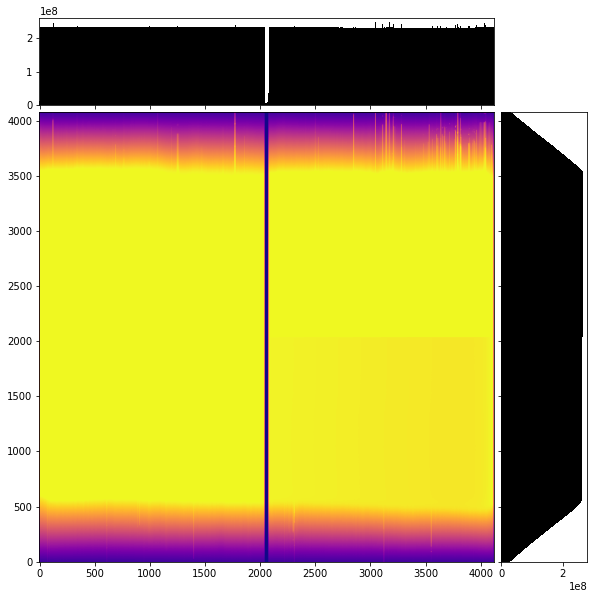

In [246]:
iframe = 11

frame = fits.open(frames_meta_match.filepath.values[iframe])

ny, nx = frame[0].data.shape
data = frame[0].data

fig, ax = plt.subplots(figsize=(10,10))

im = ax.imshow(data, origin="lower", cmap="plasma")
ax.set_aspect(1.)

divider = make_axes_locatable(ax)

ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)
# ax_color = inset_axes(
#     ax,
#     width="1%",
#     height="5%",
#     loc='upper right',
#     bbox_to_anchor=(1., 1., 0.5, 0.5),
#     bbox_transform=ax.transAxes,
#     borderpad=0
# )

ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.bar(np.arange(nx), height=data.sum(axis=0), width=1, lw=0, align="center", color="k")
ax_histy.barh(np.arange(ny), width=data.sum(axis=1), height=1, lw=0, align="center", color="k")

In [249]:
frames_meta_match.iloc[iframe]

exp_no                                                          335
date                                                     31/05/2021
location                                                        SBS
test_no                                                         NaN
test_iteration                                                  NaN
spec                                                            sp1
channel                                                          r1
sources                                                         NaN
lamp_current                                                    NaN
hartmanns                                                       NaN
exptime                                                           0
lab_temp                                                    23.6471
ccd_temp                                                  26.619778
purpose                                                         NaN
notes                                           